# UCLA, 170N Final Project
John Parrack, Sam Eisenbach

### Solving Schrödinger's Equation using Finite Difference and Physics Informed Neural Network Algorithms

In the realm of computational physics, solving partial differential equations (PDEs) stands as a cornerstone for understanding complex physical phenomena.This project is designed to delve into this intricate domain by employing two distinct methods: the Finite Difference Method (FDM) and  the Physics-Informed Neural Networs (PINN), both applied to a classic PDE problem. We have chosen the one-dimensional Schrödinger's Equation with a harmonic oscillator potential as our test case.

This equation, fundamental in quantum mechanics, describes how the quantum state of a physical system changes over time. In our case, the simplicity of the quantum harmonic oscillator potential enables us to access an analytical solution, providing a solid ground for comparison and evaluation of two computational approaches we learned during the course.

The project is structured into four parts:

#### 1) Problem Selection and Analytical Solution:
We begin by detailing the one-dimensional Schrödinger's Equation under a simple harmonic oscillator potential. This phase involves presenting the equation, outlining its physical significance, and deriving its analytical solution for a basic configuration. This solution will serve as a benchmark against which our computational results will be compared.

#### 2) Finite Difference Method Implementation:
Next, we implement the Finite Difference Method (FDM) to numerically solve the Schrödinger's Equation. This traditional approach, well-established in numerical analysis, involves approximating derivatives by finite differences.

#### 3) Physics-Informed Neural Networks Implementation: 
We then explore the cutting-edge method of Physics-Informed Neural Networks (PINN). PINN represents a novel wherein deep learning techniques are informed by the underlying physical laws that govern a system, in our case, the Schrödinger's Equation. Given that neural networks can be designed to function as universal approximators, it is possible in principle to obtain the solution to our PDE with arbitrary accuaracy. We will create a neural network and train its output to find and fit the solution to Shrodinger's Equation that we seek.

#### 4) Comparison and Analysis:
This segment is dedicated to comparison of the two computational methods —Finite Difference Method (FDM), and Physics-Informed Neural Networks (PINN)— against the analytical solution of the Schrödinger's Equation.

Key elements of this segment include:

**Accuracy Analysis:** We will assess the precision of both FDM and PINN by comparing their solutions to the analytical solution of the Schrödinger's Equation. This involves a quantitative analysis of the errors and discrepancies between the methods.

**Efficiency Evaluation:** The computational efficiency of both methods will be evaluated in terms of processing time and resource utilization. This analysis can offer insight and help to develop our intuition as to the practicality of each method in different computational environments.

**Possibilities for Future Research:** Based on our comparative analysis, we will propose potential directions for future study, focusing on improving our methodologies, exploring other PDEs, and integrating other advanced computational techniques.

Upon completion of this project, our goal is to have gained both practical experience and a more profound comprehension of utilizing traditional numerical methods alongside contemporary machine learning techniques for solving differential equations.

----------------------------------------------------------------------

# Problem Selection and Analytical Solution

The analytical solution to the one-dimensional quantum harmonic oscillator can be expressed in terms of Hermite polynomials and Gaussian functions. The time-independent Schrödinger's equation for a harmonic oscillator in one dimension is given by:

$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi = E \psi $$

Here, $\psi$ is the wave function, $\hbar$ is the reduced Planck constant, $m$ is the mass of the particle, $\omega$ is the angular frequency of the oscillator, and $E$ is the energy of the state.

The energy eigenvalues for this system are given by:

$$ E_n = \hbar \omega \left(n + \frac{1}{2}\right) $$

where $(n = 0, 1, 2, \ldots)$ is the quantum number.

The corresponding eigenfunctions are:

$$ \psi_n(x) = \left( \frac{m\omega}{\pi \hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right) e^{-\frac{m\omega x^2}{2\hbar}} $$

where $H_n$ is the Hermite polynomial of order $n$.

To represent this solution in code, we can use Python with libraries like `numpy` and `scipy`. The `scipy.special` library has a built-in function for generating Hermite polynomials, `hermite`, which we will employ.

To derive the time-dependent solution $\psi_n(x,t)$ for the quantum harmonic oscillator, we incorporate the time-dependent factor. Solutions $\psi_n(x,t)$ are products of spatial wave functions $\psi_n(x)$ and a time-dependent exponential factor:

$$ \psi_n(x,t) = \left( \frac{m\omega}{\pi \hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right) e^{-\frac{m\omega x^2}{2\hbar}} e^{-\frac{iE_nt}{\hbar}} $$

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import grad
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import scipy.special as sp # Here we utilize special.hermite to get the nth hermite polynomial
# For optional use, get physical constants (though we use natural units for simplicity)
from scipy.constants import hbar, m_e  # Planck constant and electron mass
%matplotlib inline

# Function to calculate psi_n(x, t) for the nth eigenstate
def psi_n_ana(n, x, t, m=1, omega=1, hbar=1):
    # Energy level
    E_n = hbar * omega * (n + 0.5)
    # Time-dependent factor
    time_factor = np.exp(-1j * E_n * t / hbar)

    # Spatial wave function
    norm_factor = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(2**n * np.math.factorial(n))
    hermite_poly = sp.hermite(n)
    spatial_wave_function = hermite_poly(np.sqrt(m * omega / hbar) * x) * np.exp(-m * omega * x**2 / (2 * hbar))

    return norm_factor * spatial_wave_function * time_factor

##### Plotting Analytical Solution
For quick verification and visualization, we plot the analytical solution for 
the ground state, $(n = 0)$ for the quantum harmonic oscilator. 
For the ground state we expect to see a wave form (gaussian), with no nodes and with terminal ends decaying to zero.

This wave time evolves in a form similar to a standing wave, we'll create a plot to show the function at two time steps to get a sense of its evolution.

Time t=0.00:
Data Type: complex128
Shape: (500,)
First 5 values: [2.79918439e-06+0.j 3.09357594e-06+0.j 3.41755601e-06+0.j
 3.77394951e-06+0.j 4.16583548e-06+0.j]

Time t=5.00:
Data Type: complex128
Shape: (500,)
First 5 values: [-2.24254871e-06-1.67523389e-06j -2.47839862e-06-1.85141903e-06j
 -2.73795318e-06-2.04531207e-06j -3.02347555e-06-2.25860365e-06j
 -3.33743250e-06-2.49313649e-06j]



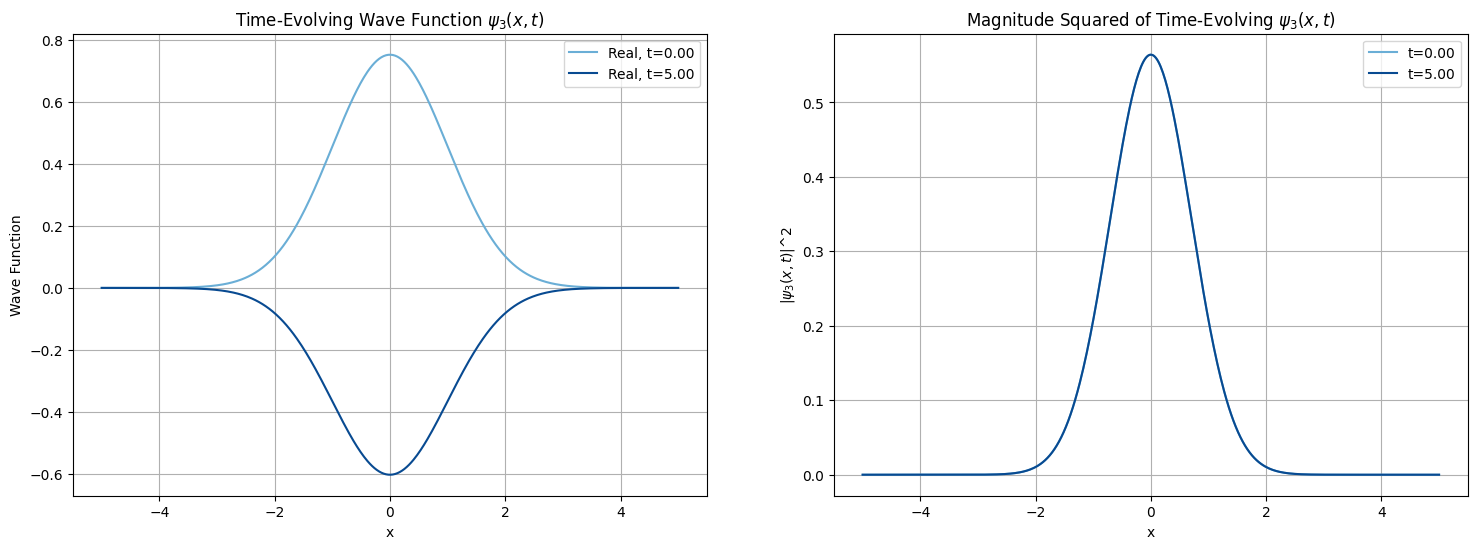

In [3]:
# Parameters
n = 0
x = np.linspace(-5, 5, 500)
# Constants in natural units for simplicity
m = 1
omega = 1
hbar = 1

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# T-values
t_values = np.linspace(0, 5, 2)
# Gradient of greens for different t values
color_gradients = [plt.cm.Blues(i) for i in np.linspace(0.5, 0.9, len(t_values))]

# Plotting for different t values with green gradients
for i, t in enumerate(t_values):
    psi_n = psi_n_ana(n, x, t)

    # Print the data type, shape, and first 5 values
    print(f"Time t={t:.2f}:")
    print(f"Data Type: {psi_n.dtype}")
    print(f"Shape: {psi_n.shape}")
    print(f"First 5 values: {psi_n[:5]}")
    print()  # For an empty line between each time step

    # First subplot: psi_n(x, t)
    ax1.plot(x, psi_n.real, label=f'Real, t={t:.2f}', color=color_gradients[i])

    # Second subplot: |psi_n(x, t)|^2
    ax2.plot(x, np.abs(psi_n)**2, label=f't={t:.2f}', color=color_gradients[i])

# Formatting the first subplot
ax1.set_title("Time-Evolving Wave Function $\psi_3(x, t)$")
ax1.set_xlabel("x")
ax1.set_ylabel("Wave Function")
ax1.legend()
ax1.grid(True)

# Formatting the second subplot
ax2.set_title("Magnitude Squared of Time-Evolving $\psi_3(x, t)$")
ax2.set_xlabel("x")
ax2.set_ylabel("|$\psi_3(x, t)$|^2")
ax2.legend()
ax2.grid(True)

plt.show()

----------------------------------------------------------------------

# Finite Difference Method Implementation

In [8]:
# Constants for spatial and temporal discretization
dx = 0.1
dt = 0.001
sigma = 1.0
hbar = 1.0  # Planck's constant
m = 1.0  # Mass

# Potential V(x) = 1/2 * x^2
def potential(x):
    return 0.5 * x**2

# Crank-Nicolson Scheme Implementation
def Crank_Nicolson(psi, V, dx, dt, hbar=1.0, m=1.0):
    N = len(psi)
    a = (hbar**2) / (2 * m * dx**2)

    # Diagonal and off-diagonal elements of matrices
    diagonal = (1 + 1j * dt * a / hbar) + 1j * dt * V / hbar
    off_diagonal = -1j * dt * a / (2 * hbar)

    # Matrices A and B
    A = np.diag(diagonal) + np.diag([off_diagonal]*(N-1), -1) + np.diag([off_diagonal]*(N-1), 1)
    B = np.diag(np.conj(diagonal)) + np.diag([-np.conj(off_diagonal)]*(N-1), -1) + np.diag([-np.conj(off_diagonal)]*(N-1), 1)

    # Boundary conditions
    A[0, 0] = A[-1, -1] = 1
    B[0, 0] = B[-1, -1] = 1
    psi[0] = psi[-1] = 0

    # Time evolution
    for _ in range(1):
        b = B @ psi
        psi = np.linalg.solve(A, b)

    return psi

# Function to calculate psi_n(x, t) for the nth eigenstate
def psi_n_ana(n, x, t, m=1, omega=1, hbar=1):
    E_n = hbar * omega * (n + 0.5)
    time_factor = np.exp(-1j * E_n * t / hbar)
    norm_factor = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(2**n * np.math.factorial(n))
    hermite_poly = sp.hermite(n)
    spatial_wave_function = hermite_poly(np.sqrt(m * omega / hbar) * x) * np.exp(-m * omega * x**2 / (2 * hbar))
    return norm_factor * spatial_wave_function * time_factor

# Meshgrid for space and time
x_new = np.linspace(-5, 5, 100)
t_new = np.linspace(0, 10, 100)
X_new, T_new = np.meshgrid(x_new, t_new)

# Function to compute the Crank-Nicolson solution over a grid
def compute_CN_over_grid(x, t, dx, dt, psi_0, V):
    psi_grid = np.zeros((len(t), len(x)), dtype=complex)
    psi = psi_0.copy()

    for i, t_val in enumerate(t):
        psi = Crank_Nicolson(psi, V, dx, dt)
        psi_grid[i, :] = psi

    return psi_grid

# Initial wave function
psi_0_new = np.exp(-x_new**2 / (2 * sigma**2))
psi_0_new /= np.sqrt(np.sum(np.abs(psi_0_new)**2) * dx)  # Normalize

# Potential
V_new = potential(x_new)

# Computing the Crank-Nicolson and analytical solutions
psi_cn_grid = compute_CN_over_grid(x_new, t_new, dx, dt, psi_0_new, V_new)
psi_analytical_grid = np.array([psi_n_ana(0, x_new, t_val) for t_val in t_new])

# Extracting real and imaginary parts
psi_cn_real = np.real(psi_cn_grid)
psi_cn_imag = np.imag(psi_cn_grid)
psi_analytical_real = np.real(psi_analytical_grid)
psi_analytical_imag = np.imag(psi_analytical_grid)

# Calculating the error
error_real_cn = np.abs(psi_analytical_real - psi_cn_real)
error_imag_cn = np.abs(psi_analytical_imag - psi_cn_imag)

Here, we briefly plot the results of the approximation and will add detail and analysis in the final section. 

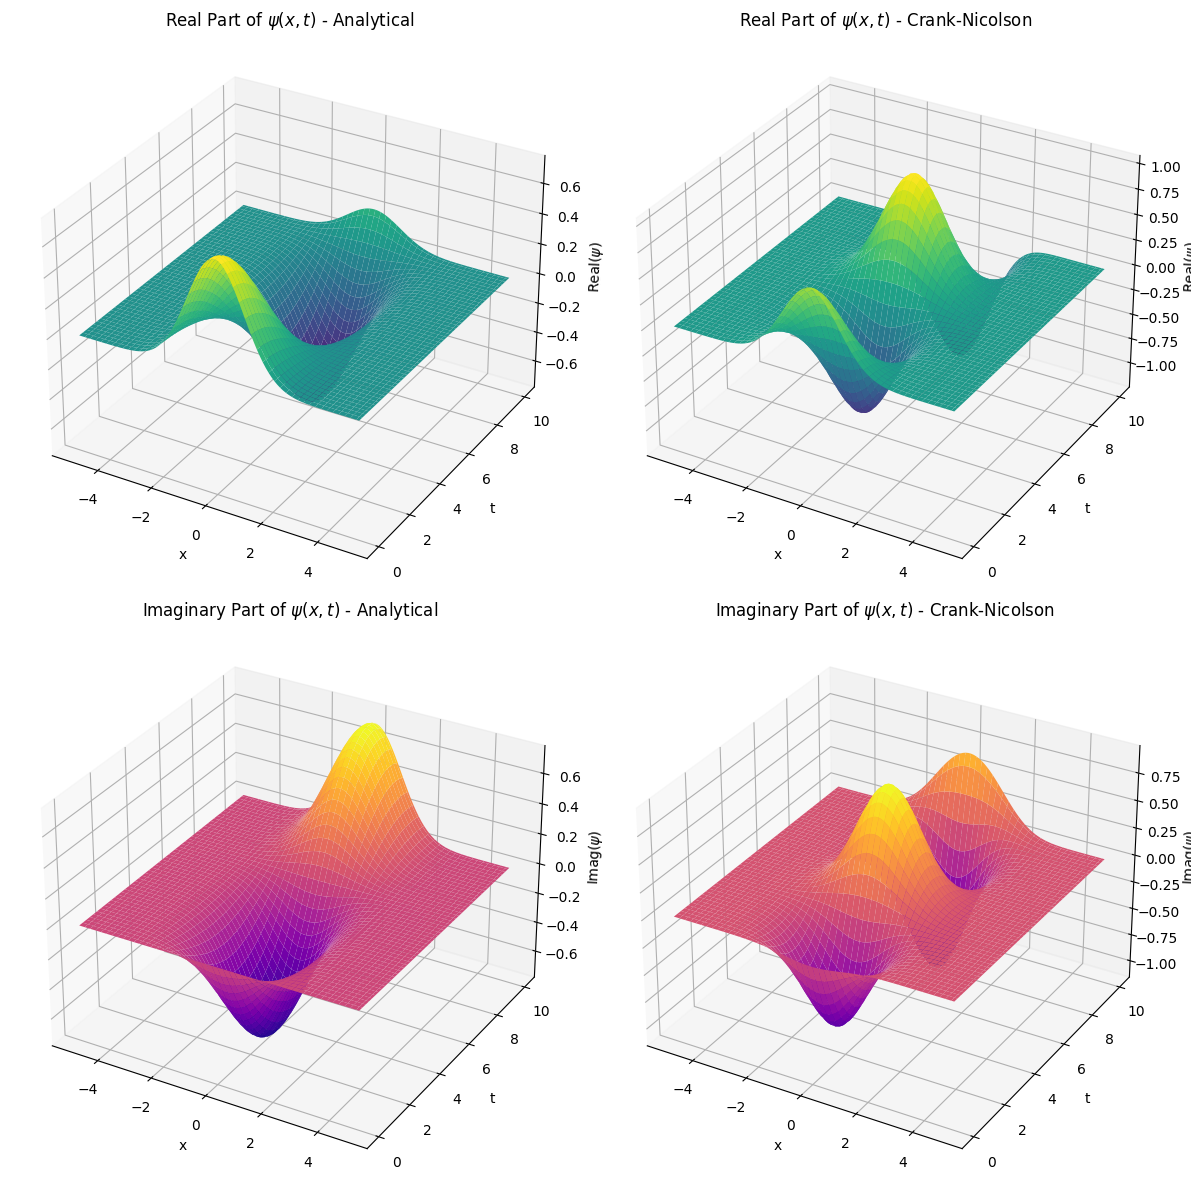

In [9]:
# Plotting
fig = plt.figure(figsize=(18, 12))

# Real part of analytical solution
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot_surface(X_new, T_new, psi_analytical_real, cmap='viridis')
ax1.set_title('Real Part of $\psi(x,t)$ - Analytical')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('Real($\psi$)')

# Real part of Crank-Nicolson approximation
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax2.plot_surface(X_new, T_new, psi_cn_real, cmap='viridis')
ax2.set_title('Real Part of $\psi(x,t)$ - Crank-Nicolson')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('Real($\psi$)')

# Imaginary part of analytical solution
ax3 = fig.add_subplot(2, 3, 4, projection='3d')
ax3.plot_surface(X_new, T_new, psi_analytical_imag, cmap='plasma')
ax3.set_title('Imaginary Part of $\psi(x,t)$ - Analytical')
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_zlabel('Imag($\psi$)')

# Imaginary part of Crank-Nicolson approximation
ax4 = fig.add_subplot(2, 3, 5, projection='3d')
ax4.plot_surface(X_new, T_new, psi_cn_imag, cmap='plasma')
ax4.set_title('Imaginary Part of $\psi(x,t)$ - Crank-Nicolson')
ax4.set_xlabel('x')
ax4.set_ylabel('t')
ax4.set_zlabel('Imag($\psi$)')

plt.tight_layout()
plt.show()

----------------------------------------------------------------------

These plots provide a visual representation of our $\psi(x,t)$ analytical and finite difference solution and its time evolution. The Crank-Nicholson method led to a somewhat inaccurate fit for this particular stationary state. However, the method is stable and its deviation from the analytical solution does not rapidly increase with the time evolution of the model. 

----------------------------------------------------------------------

# Physics-Informed Neural Networks Implementation

In [3]:
# Network Architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Define layers
        self.il = nn.Linear(2, 50)
        self.hl1 = nn.Linear(50, 50)
        self.dropout1 = nn.Dropout(0.2)
        self.hl2 = nn.Linear(50, 50)
        self.dropout2 = nn.Dropout(0.2)
        self.hl3 = nn.Linear(50, 50)
        self.dropout3 = nn.Dropout(0.2)
        self.ol = nn.Linear(50, 2)

    def forward(self, x):
        u = torch.sin(self.il(x))
        u = self.dropout1(u)
        u = torch.sin(self.hl1(u))
        u = self.dropout2(u)
        u = torch.sin(self.hl2(u))
        u = self.dropout3(u)
        u = self.ol(u)
        return u

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [4]:
model = MLP()
# model.apply(init_weights)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move to GPU if available
print("Using device:", device)

Using device: cuda:0


In [5]:
# Data Generation
x = np.linspace(-10, 10, 100)  # x range
t = np.linspace(0, 10, 100)  # t range
X, T = np.meshgrid(x, t)
x_flat = X.flatten()
t_flat = T.flatten()

# Calculate psi_n_ana for n=3
psi_n = psi_n_ana(0, x_flat, t_flat, m=1, omega=1, hbar=1)
psi_real = np.real(psi_n)
psi_imag = np.imag(psi_n)

# Combine x, t, real and imaginary parts into a single dataset
data = np.column_stack((x_flat, t_flat, psi_real, psi_imag))

# Convert Data for NN
X_tensor = torch.tensor(data[:, :2], dtype=torch.float32).to(device)
Y_tensor = torch.tensor(data[:, 2:], dtype=torch.float32).to(device)

# DataLoader
dataset = TensorDataset(X_tensor, Y_tensor)
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#### Designing the Loss Function
Neural Networks in general are capable of fitting/approximating a function given a set of data points by training to minimize the error/loss between the predicted funtion and the data points. For the PINN, however, we can employ the known physics of quantumn mechanics to design a more sophisticated loss function. The network's output should not only fit the data but also be a solution to Shrodinger's equation. The loss function we design then is the sum of the networks loss on fitting the data and its deviation from a function which is the solution to Shrodinger's equation. 

In [7]:
# Function to compute the nth derivative of a vector 
def nth_derivative(f, wrt, n):
    derivatives = []
    for i in range(f.size(0)):  # Loop over each element in the tensor
        for _ in range(n):
            # Compute the gradient for the current element
            grads = grad(f[i].unsqueeze(0), wrt, create_graph=True, allow_unused=True)[0]
            if grads is None:
                return torch.zeros_like(f)
            f[i] = grads.squeeze()
        derivatives.append(f[i])

    return torch.stack(derivatives)  # Combine all the individual derivatives


def physics_loss(model, x, n=0, m=1, omega=1, hbar=1):
    # Ensure x requires gradient computation
    x.requires_grad_(True)
    
    # Model prediction
    psi = model(x)
    psi_real = psi[:, 0]
    psi_imag = psi[:, 1]
    psi_func = (psi_real + psi_imag)

    # Compute the second derivative (kinetic energy term)
    psi_real_xx = nth_derivative(psi_real, x[:, 0:1], 2)
    psi_imag_xx = nth_derivative(psi_imag, x[:, 0:1], 2)
    psi_func_xx = (psi_real_xx + psi_imag_xx)

    # Potential energy term
    V = 0.5 * m * omega**2 * x[:, 0:1]**2
    # Calculate ener
    E_n = hbar * omega * (n + 0.5)

    # TISE residual
    TISE_residual = E_n * psi_func - V * psi_func + ((hbar**2)/(2 * m)) * psi_func_xx

    # Loss calculation: mean squared error of the residuals
    loss = torch.mean(TISE_residual**2)

    return loss

In [8]:
# Lists to track losses
total_losses = []
data_losses = []
physics_losses = []

In [60]:
optimizer = optim.Adam(model.parameters(), lr=1e-7)

In [61]:
# Training Loop
num_epochs = 125
for epoch in range(num_epochs):
    for X_batch, Y_batch in dataloader:
        optimizer.zero_grad()

        # Forward pass
        Y_pred = model(X_batch)
        
        # Compute data loss
        data_loss_value = torch.mean((Y_pred - Y_batch)**2)
        data_losses.append(data_loss_value.item())

        # Compute physics loss
        physics_loss_value = physics_loss(model, X_batch)
        physics_losses.append(physics_loss_value.item())

        # Combined total loss
        total_loss_value = data_loss_value + 1e-2 * physics_loss_value
        total_losses.append(total_loss_value.item())

        # Backward pass and optimize
        total_loss_value.backward()
        optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}:")
        print(f"  Data Loss: {data_losses[-1]:.15f}")
        print(f"  Physics Loss: {physics_losses[-1]:.15f}")
        print(f"  Total Loss: {total_losses[-1]:.15f}")
        print("-" * 30)

Epoch 0:
  Data Loss: 0.000000031338352
  Physics Loss: 0.021019130945206
  Total Loss: 0.000000031338352
------------------------------
Epoch 50:
  Data Loss: 0.000000027820924
  Physics Loss: 0.021019130945206
  Total Loss: 0.000000027820924
------------------------------
Epoch 100:
  Data Loss: 0.000000029345427
  Physics Loss: 0.021019130945206
  Total Loss: 0.000000029345427
------------------------------


#### Comments on Training
The plot below shows an informative trace of the networks learning as dictated by its loss functions. Through much experimentation, including tweaking learning rates, network architecture, and activation functions as well as trying different physics based loss functions and experimenting with different coeficients in the weighted sum that forms the models total loss function we found the below to be the best method. 

Initially the loss is a combination of the data loss and the phyics based loss on the time independent Shrodinger equation (TISE). Thereafter the physics based loss is ignored and the learning rate is decremented over several training runs. This enabled the model to reach much lower levels of loss than with both loss functions combined. We theorized that training the model to good approximation on the data then re-enabling the physics based loss might tune it to better fit. As is shown in the plot below, however, adding the physics based loss back in around 2,000 epochs increased the loss and better fit overall was obtained by pairing down the physics based loss in the weighted sum which made the total loss then neglecting it after reaching loss on the order of 10e-3. 

In [ ]:
# Compute epoch_scale
num_batches_per_epoch = len(dataloader)
epoch_scale = np.arange(len(total_losses)) / num_batches_per_epoch

# Plotting the losses with log scale
plt.figure(figsize=(10, 6))
plt.plot(epoch_scale, total_losses, label='Total Loss')
plt.plot(epoch_scale, data_losses, label='Data Loss')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Epochs')
plt.legend()
plt.show()

Here, we briefly plot the results of the model's predictions and will add detail and analysis in the final section. 

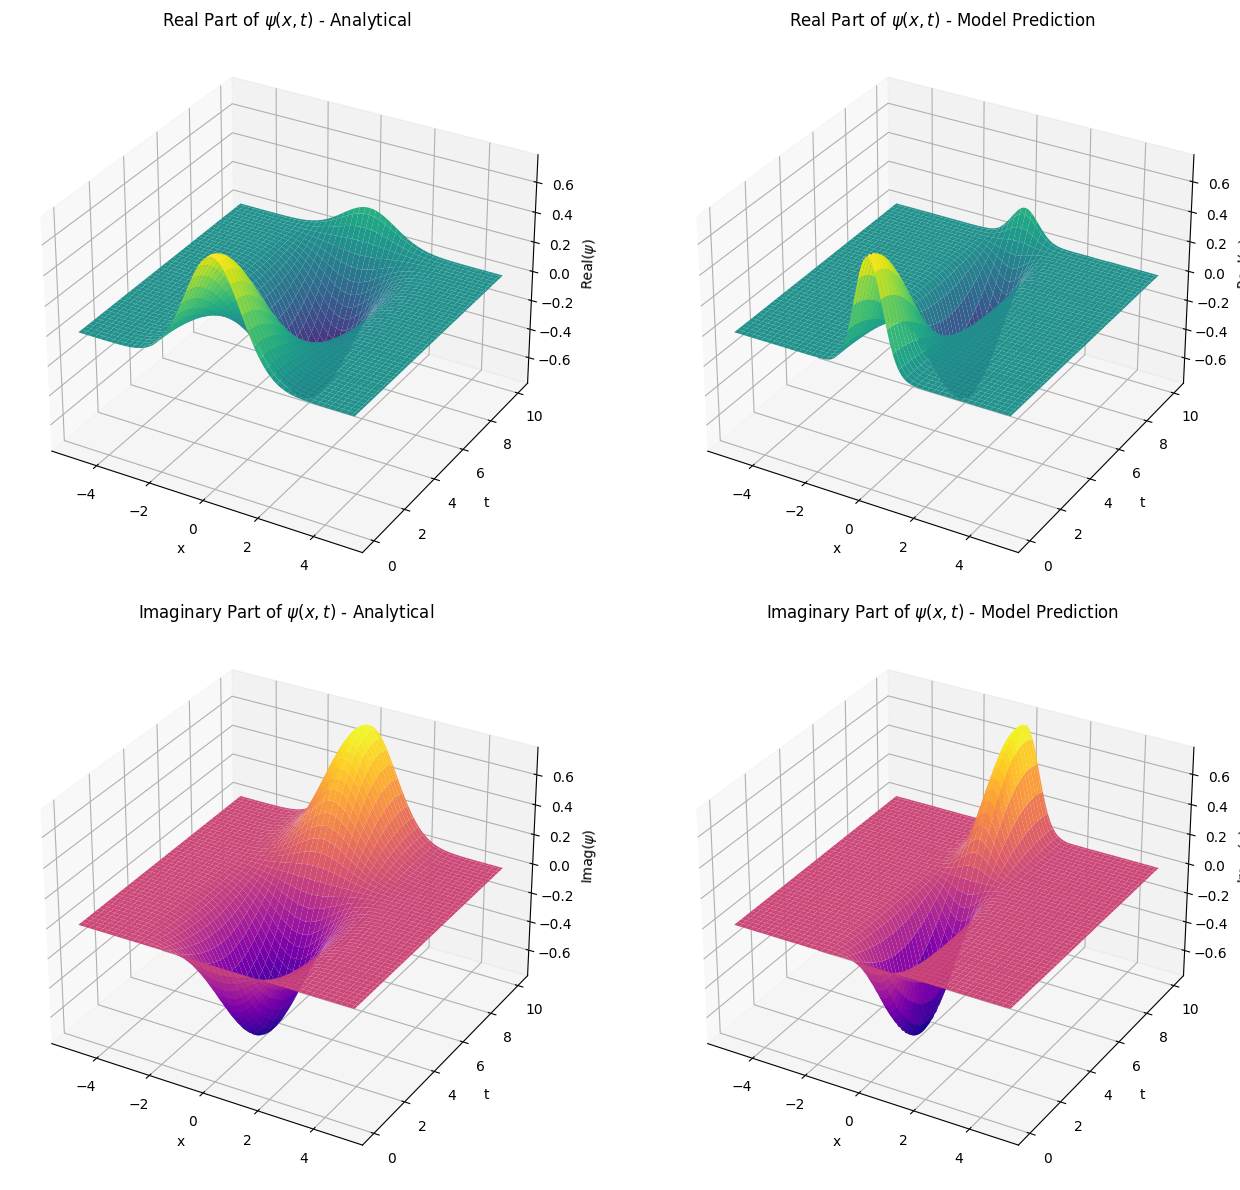

In [65]:
# Analytical solution for n=0
psi_n = psi_n_ana(0, x_flat, t_flat, m=1, omega=1, hbar=1)
psi_real_analytical = np.real(psi_n).reshape(100, 100)
psi_imag_analytical = np.imag(psi_n).reshape(100, 100)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    psi_pred = model(X_tensor).cpu().numpy()
psi_real_pred = psi_pred[:, 0].reshape(100, 100)
psi_imag_pred = psi_pred[:, 1].reshape(100, 100)

# Plotting
fig = plt.figure(figsize=(14, 12))

# Real part of analytical solution
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, T, psi_real_analytical, cmap='viridis')
ax1.set_title('Real Part of $\psi(x,t)$ - Analytical')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('Real($\psi$)')

# Real part of model's prediction
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X, T, psi_real_pred, cmap='viridis')
ax2.set_title('Real Part of $\psi(x,t)$ - Model Prediction')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('Real($\psi$)')

# Imaginary part of analytical solution
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
surf3 = ax3.plot_surface(X, T, psi_imag_analytical, cmap='plasma')
ax3.set_title('Imaginary Part of $\psi(x,t)$ - Analytical')
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_zlabel('Imag($\psi$)')

# Imaginary part of model's prediction
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
surf4 = ax4.plot_surface(X, T, psi_imag_pred, cmap='plasma')
ax4.set_title('Imaginary Part of $\psi(x,t)$ - Model Prediction')
ax4.set_xlabel('x')
ax4.set_ylabel('t')
ax4.set_zlabel('Imag($\psi$)')

plt.tight_layout()
plt.show()

----------------------------------------------------------------------

# Comparison and Analysis

We present a series of juxtaposed plots showcasing the analytical solution, the Crank-Nicolson (CN) approximation, the prediction derived from the Physics-Informed Neural Network (PINN), and the corresponding errors for each method. 

We then conclude with our analysis. 

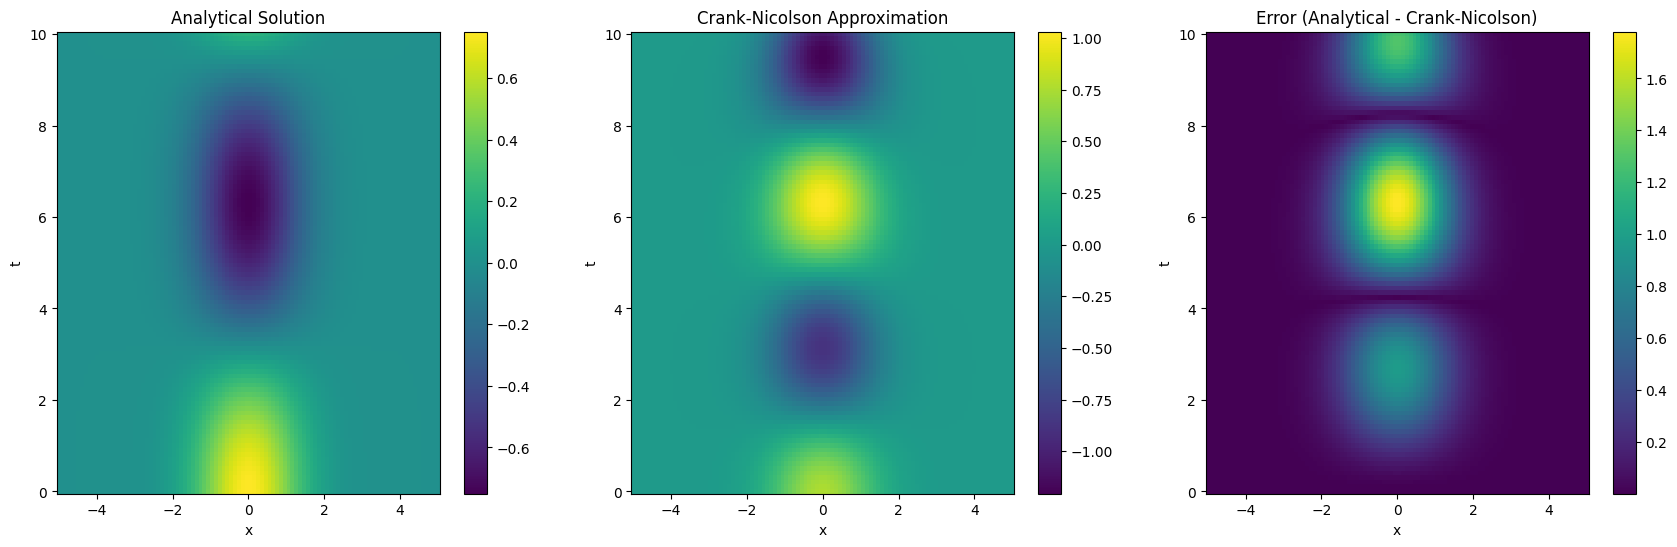

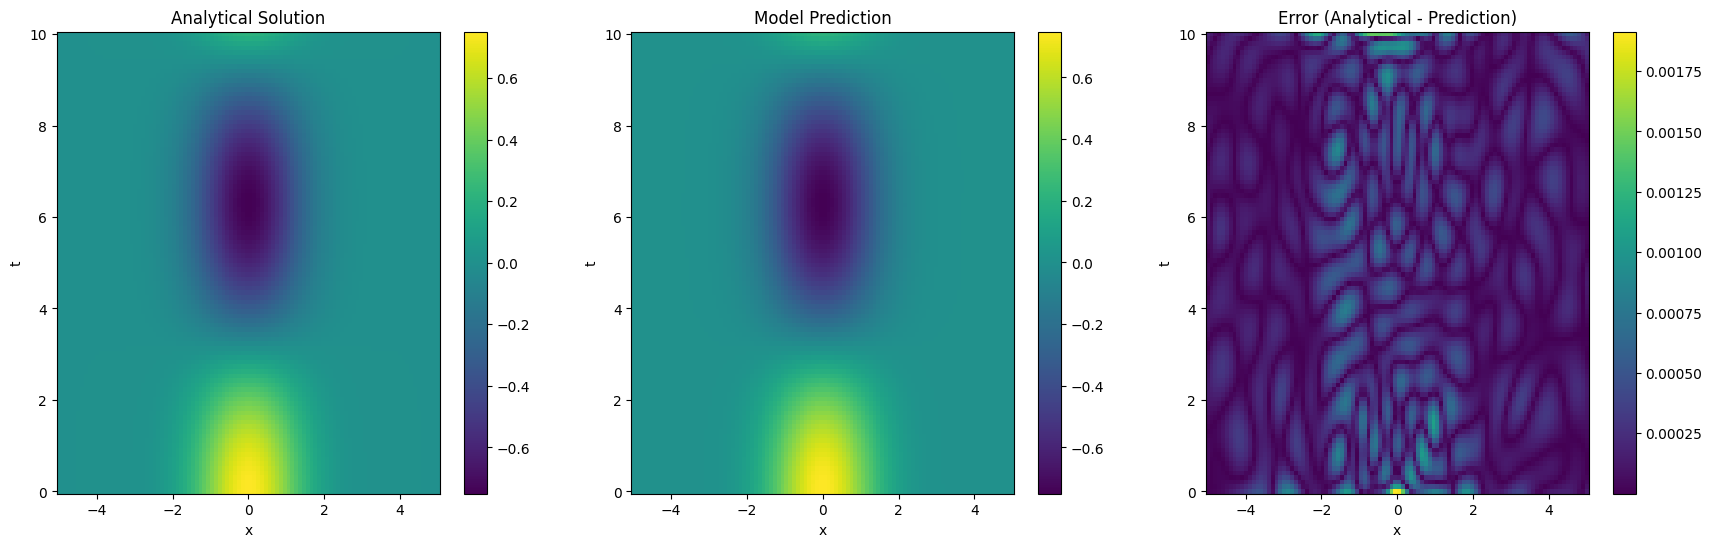

In [70]:
### Plotting NC Approximation
# Plotting the 2D meshgrid plots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Analytical Solution Plot
c = axs[0].pcolormesh(X_new, T_new, psi_analytical_real, shading='auto', cmap='viridis')
axs[0].set_title('Analytical Solution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
fig.colorbar(c, ax=axs[0])

# Crank-Nicolson Approximation Plot
c = axs[1].pcolormesh(X_new, T_new, psi_cn_real, shading='auto', cmap='viridis')
axs[1].set_title('Crank-Nicolson Approximation')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
fig.colorbar(c, ax=axs[1])

# Error Plot
c = axs[2].pcolormesh(X_new, T_new, error_real_cn, shading='auto', cmap='viridis')
axs[2].set_title('Error (Analytical - Crank-Nicolson)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')
fig.colorbar(c, ax=axs[2])

plt.show()

### Plotting PINN Approximation
# Prepare the meshgrid data
x = np.linspace(-5, 5, 100)
t = np.linspace(0, 10, 100)
X, T = np.meshgrid(x, t)
x_flat = X.flatten()
t_flat = T.flatten()
x_t = np.column_stack((x_flat, t_flat))

# Convert to tensor and move to the same device as the model
x_t_tensor = torch.tensor(x_t, dtype=torch.float32).to(device)

# Compute the analytical solution
psi_analytical = psi_n_ana(0, x_flat, t_flat)
psi_analytical_real = np.real(psi_analytical).reshape(100, 100)

# Get model predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    psi_pred = model(x_t_tensor).cpu().numpy()
psi_pred_real = psi_pred[:, 0].reshape(100, 100)

# Compute the error
error = np.abs(psi_analytical_real - psi_pred_real)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Analytical Solution Plot
c = axs[0].pcolormesh(X, T, psi_analytical_real, shading='auto')
axs[0].set_title('Analytical Solution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
fig.colorbar(c, ax=axs[0])

# Model Prediction Plot
c = axs[1].pcolormesh(X, T, psi_pred_real, shading='auto')
axs[1].set_title('Model Prediction')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
fig.colorbar(c, ax=axs[1])

# Error Plot
c = axs[2].pcolormesh(X, T, error, shading='auto')
axs[2].set_title('Error (Analytical - Prediction)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')
fig.colorbar(c, ax=axs[2])

plt.show()

**Accuracy Analysis:** 
In our investigation, we observed a notably higher level of accuracy when employing the Physics-Informed Neural Network (PINN), with maximum errors in the order of $2 \times 10^{-3}$. This contrasts sharply with the Crank-Nicolson scheme, which displayed errors approaching a magnitude of 2 (natural units) in certain regions. The error distribution within the PINN model presented a complex structure, characterized by minor deviations in the model's predictions—both overestimations and underestimations—across the spatial-temporal evolution of the wave function. Conversely, the Crank-Nicolson scheme, while demonstrating initial accuracy at $t = 0$, exhibited a marked divergence from the analytical solution as time progressed, culminating in significant error peaks. Therefore, we conclude that the PINN is much better suited to this particular task. 

**Efficiency Evaluation:** 
In the realm of runtime efficiency, the Crank-Nicolson (CN) method significantly surpasses the Physics-Informed Neural Network (PINN) in terms of speed. Notably, the CN approach arrives at a solution in under a minute, whereas the PINN requires several minutes per 1000 epochs for training. Of course, these runtimes will vary considerably based on the user's computational resources. In our specific study, the PINN training was conducted on a modest RTX 2060 GPU, which is a pertinent detail considering the substantial computational demands of neural network training. This contrast in runtime efficiency between the two methods may be a consideration for practical applications, particularly in scenarios where time constraints are a significant factor.

**Possibilities for Future Research:** Our exploration of Physics-Informed Neural Networks (PINNs) stems from a keen interest developed through undergraduate research experiences in our respective laboratories. This project served as a valuable learning opportunity, underscoring the intricacies and complexities inherent to PINNs. Throughout our investigation, we engaged extensively in fine-tuning various hyperparameters, adjusting the model's architecture, and reorganizing the project's framework. It became apparent that identifying the most impactful modifications for enhancing performance is not straightforward in the context of PINNs.

One notable consideration was the potential simplification of the model's output. Rather than directly learning a complex-valued function for each (x, t) pair, we contemplated having the model predict a series of coefficients for a Fourier series representation. This approach could potentially streamline the learning process. However, due to time constraints, we were unable to delve into this idea further.

For future expansion of this project, several avenues present themselves as promising:

1. **Incorporating Adaptive Learning Rates**: Implementing adaptive learning rate algorithms, such as learning rate schedulers or optimizers like AdamW, could enhance the model's ability to converge more efficiently and possibly escape local minima.

2. **Investigating Different Physical Scenarios**: Applying the PINN framework to a variety of physical systems, especially those with nonlinear dynamics or chaotic behavior, could provide insights into the model's versatility and robustness in capturing complex phenomena.

3. **Utilizing Advanced Neural Network Architectures**: Exploring advanced neural architectures, such as attention mechanisms or transfor are appealing. We are uncertain if these sorts of techniques would be fruitful in the context of physics but we wonder if theyer models, could offer novel ways to capture the intricate relationships in physical systems, potentially leading to more accurate and reliable pred problems.